# Looking at preliminary DBTL3 data

For DBTL3, David has re-worked the dCas9 linkers so that dCas9 can't be excised through simple recombination in putida. The goal of this change is to increase dCas9 expression and get more reliable protein knockout.

We have some preliminary data that I'd like to compare with the data from DBTL2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import dbtl3 data
The format of the DBTl3 data is currently a little rough, import separate excel sheets and merge them

In [2]:
dbtl3_p1 = pd.read_excel('./240202_DBTL3_Plate1+2_GCFID_Data_toPCK.xlsx', sheet_name = 'Plate 1 pck')
dbtl3_p1.head(3)

,Sample Name,Name,RT,Area,Amount,Unit,Concentration [],ID number,line_name_norep,Strain
0,DBTL3_001,isoprenol,3.990,2110.9619,473.430,mg/L,473.4303,3,PP_0528_PP_0813_PP_0815_PP_1317,PP_0528_PP_0813_PP_0815_PP_1317-R1
1,DBTL3_002,isoprenol,3.992,1920.4810,325.893,mg/L,325.8933,7,PP_0528_PP_0813_PP_4191,PP_0528_PP_0813_PP_4191-R1
2,DBTL3_003,isoprenol,3.990,1878.4215,372.179,mg/L,372.1794,8,PP_0528_PP_0814_PP_4191,PP_0528_PP_0814_PP_4191-R1


In [3]:
dbtl3_p2 = pd.read_excel('./240202_DBTL3_Plate1+2_GCFID_Data_toPCK.xlsx', sheet_name = 'Plate 2 pck')
dbtl3_p2.head(3)

,Sample Name,Name,RT,Area,Amount,Unit,Concentration [],ID number,line_name_norep,Strain
0,DBTL3_P2_001,isoprenol,3.985,1312.9922,308.837,mg/L,308.8368,26,PP_0751_PP_0813_PP_4191,PP_0751_PP_0813_PP_4191-R1
1,DBTL3_P2_002,isoprenol,3.988,1736.3203,403.231,mg/L,403.2312,30,PP_0751_PP_0813_PP_4189,PP_0751_PP_0813_PP_4189-R1
2,DBTL3_P2_003,isoprenol,3.987,1480.8812,335.955,mg/L,335.9553,31,PP_0751_PP_0814_PP_1769,PP_0751_PP_0814_PP_1769-R1


Merge the dataframes into a single df for DBTL3

In [4]:
dbtl3_p1['plate'] = 1
dbtl3_p2['plate'] = 2
df_dbtl3 = pd.concat([dbtl3_p1, dbtl3_p2])
print(f'p1 dataframe shape: {dbtl3_p1.shape}\np2 dataframe shape: {dbtl3_p2.shape}\nconcatenated dataframe shape: {df_dbtl3.shape}')
df_dbtl3.head(3)

p1 dataframe shape: (48, 11)
p2 dataframe shape: (48, 11)
concatenated dataframe shape: (96, 11)


,Sample Name,Name,RT,Area,Amount,Unit,Concentration [],ID number,line_name_norep,Strain,plate
0,DBTL3_001,isoprenol,3.990,2110.9619,473.430,mg/L,473.4303,3,PP_0528_PP_0813_PP_0815_PP_1317,PP_0528_PP_0813_PP_0815_PP_1317-R1,1
1,DBTL3_002,isoprenol,3.992,1920.4810,325.893,mg/L,325.8933,7,PP_0528_PP_0813_PP_4191,PP_0528_PP_0813_PP_4191-R1,1
2,DBTL3_003,isoprenol,3.990,1878.4215,372.179,mg/L,372.1794,8,PP_0528_PP_0814_PP_4191,PP_0528_PP_0814_PP_4191-R1,1


## Import DBTL2 data

In [5]:
df_dbtl2 = pd.read_pickle('../isoprenol_data/dbtl2_isoprenol.pkl')
df_dbtl2.head(3)

,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours
0,194881,CRISPRi automation for enhanced isoprenol prod...,194882,c86dfaf3-ec02-463c-96c8-f8fe122b02cc,PP_0528_PP_0815_PP_1317_PP_4191-R1,DBTL2_P1_001,GC-FID,195074,PP_0528_PP_0815_PP_1317_PP_4191-R1,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,201.9179,48.0
1,194881,CRISPRi automation for enhanced isoprenol prod...,194883,c76bdfef-08b8-463c-8c1e-324e10fe5eee,PP_0528_PP_0813_PP_0815_PP_1317-R1,DBTL2_P1_002,GC-FID,195075,PP_0528_PP_0813_PP_0815_PP_1317-R1,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,392.7469,48.0
2,194881,CRISPRi automation for enhanced isoprenol prod...,194884,0d59d68e-24f6-4d82-9235-787339f485bd,PP_0528_PP_0814_PP_0815_PP_1317-R1,DBTL2_P1_003,GC-FID,195076,PP_0528_PP_0814_PP_0815_PP_1317-R1,cid:12988,3-METHYL-3-BUTEN-1-OL,0,mg/L,457.0174,48.0


## Create a merged dataframe for dbtl2 and dbtl3
I only need to keep cycle number, line name, and isoprenol levels for this comparison

In [6]:
df_dbtl2['cycle'] = 2
df_dbtl3['cycle'] = 3

Filter out dbtl2 data that isn't in dbtl3

In [9]:
df_dbtl2['in_dbtl3'] = df_dbtl2['Line Name'].apply(lambda x: x in df_dbtl3['Strain'].unique())
df_dbtl2['in_dbtl3'].value_counts()
df_dbtl2 = df_dbtl2.loc[df_dbtl2['in_dbtl3'],:]

Drop extra columns

In [10]:
df_dbtl2 = df_dbtl2.loc[:, ['Line Name', 'Value', 'cycle']]
df_dbtl3 = df_dbtl3.loc[:, ['Strain', 'Amount', 'cycle']]


Rename columns from df_dbtl3

In [11]:
dbtl3_rename_dict = {'Strain':'Line Name', 'Amount': 'Value'}
df_dbtl3 = df_dbtl3.rename(columns=dbtl3_rename_dict)

In [12]:
df_dbtl3

,Line Name,Value,cycle
0,PP_0528_PP_0813_PP_0815_PP_1317-R1,473.430,3
1,PP_0528_PP_0813_PP_4191-R1,325.893,3
2,PP_0528_PP_0814_PP_4191-R1,372.179,3
3,PP_0528_PP_0751_PP_4191-R1,400.745,3
4,PP_0528_PP_0815_PP_4191-R1,398.063,3
...,...,...,...
43,PP_0813_PP_1769-R3,353.912,3
44,PP_0812_PP_4189-R3,322.120,3
45,PP_2136_PP_4189-R3,279.313,3
46,PP_0437_PP_4189-R3,328.585,3


In [13]:
df = pd.concat([df_dbtl2, df_dbtl3])
print(f'merged dataframe shape: {df.shape}')
print(f"df cycle valuecounts: {df['cycle'].value_counts()}")
df.head(3)


merged dataframe shape: (186, 3)
df cycle valuecounts: cycle
3    96
2    90
Name: count, dtype: int64


,Line Name,Value,cycle
1,PP_0528_PP_0813_PP_0815_PP_1317-R1,392.7469,2
3,PP_0528_PP_0813_PP_4191-R1,361.4189,2
4,PP_0528_PP_0751_PP_4191-R1,321.5996,2


In [18]:
df['line_name_norep'] = df['Line Name'].apply(lambda x: x[:-3])
df['is_control'] = df['line_name_norep'].apply(lambda x: 'ontrol' in x)
df.loc[df['is_control'], 'line_name_norep'] = 'Control'
df['line_name_cycle'] = df.apply(lambda x: x['line_name_norep'] + '_c' + str(x['cycle']), axis = 1)

In [20]:
df['line_name_cycle'].value_counts()

line_name_cycle
Control_c3                            6
PP_0751_PP_0813_PP_4191_c3            6
PP_0528_PP_0813_PP_4191_c2            3
PP_0528_PP_0814_PP_4191_c3            3
PP_0528_PP_0751_PP_4191_c3            3
PP_0528_PP_0815_PP_4191_c3            3
PP_0815_PP_1317_PP_4191_c3            3
PP_0528_PP_0812_PP_4191_c3            3
PP_0368_PP_0528_PP_4191_c3            3
PP_0812_PP_0815_PP_1317_c3            3
PP_0751_PP_0815_PP_1317_c3            3
PP_0814_PP_0815_PP_1317_c3            3
PP_0813_PP_0815_PP_1317_c3            3
PP_0815_PP_1317_PP_4189_c3            3
PP_0813_PP_4189_PP_4191_c3            3
PP_0528_PP_0813_PP_0815_PP_1317_c2    3
PP_0751_PP_0813_PP_4189_c3            3
PP_0751_PP_0814_PP_1769_c3            3
PP_0751_PP_0813_PP_0814_c3            3
PP_0813_PP_1769_PP_4189_c3            3
PP_0813_PP_0814_PP_1769_c3            3
PP_0751_PP_0814_c3                    3
PP_0813_PP_0814_c3                    3
PP_1769_PP_4189_c3                    3
PP_0812_PP_0814_c3      

In [28]:
df_merge = df[['line_name_cycle', 'Value']].groupby('line_name_cycle').mean()
df_merge = df_merge.rename(columns = {'Value':'mean'})
df_std = df[['line_name_cycle', 'Value']].groupby('line_name_cycle').std()
df_std = df_std.rename(columns={'Value':'std'})
df_merge = pd.concat([df_merge, df_std], axis = 1)
df_merge = df_merge.reset_index()
df_merge['line_name_norep'] = df_merge['line_name_cycle'].apply(lambda x: x[:-3])
df_merge['cycle'] = df_merge['line_name_cycle'].apply(lambda x: int(x[-1]))
df_merge

,line_name_cycle,mean,std,line_name_norep,cycle
0,Control_c2,142.357633,3.679049,Control,2
1,Control_c3,172.650000,9.189320,Control,3
2,PP_0368_PP_0528_PP_4191_c2,328.502033,13.941253,PP_0368_PP_0528_PP_4191,2
3,PP_0368_PP_0528_PP_4191_c3,337.627333,8.853899,PP_0368_PP_0528_PP_4191,3
4,PP_0437_PP_4189_c2,339.156567,12.248257,PP_0437_PP_4189,2
5,PP_0437_PP_4189_c3,290.934000,36.588820,PP_0437_PP_4189,3
6,PP_0528_PP_0751_PP_4191_c2,304.849667,15.667034,PP_0528_PP_0751_PP_4191,2
7,PP_0528_PP_0751_PP_4191_c3,376.445000,22.514073,PP_0528_PP_0751_PP_4191,3
8,PP_0528_PP_0812_PP_4191_c2,342.654067,3.418698,PP_0528_PP_0812_PP_4191,2
9,PP_0528_PP_0812_PP_4191_c3,349.880333,12.761455,PP_0528_PP_0812_PP_4191,3


In [34]:
df

,Line Name,Value,cycle,line_name_norep,is_control,line_name_cycle
1,PP_0528_PP_0813_PP_0815_PP_1317-R1,392.7469,2,PP_0528_PP_0813_PP_0815_PP_1317,False,PP_0528_PP_0813_PP_0815_PP_1317_c2
3,PP_0528_PP_0813_PP_4191-R1,361.4189,2,PP_0528_PP_0813_PP_4191,False,PP_0528_PP_0813_PP_4191_c2
4,PP_0528_PP_0751_PP_4191-R1,321.5996,2,PP_0528_PP_0751_PP_4191,False,PP_0528_PP_0751_PP_4191_c2
9,PP_0528_PP_0813_PP_0815_PP_1317-R2,395.2054,2,PP_0528_PP_0813_PP_0815_PP_1317,False,PP_0528_PP_0813_PP_0815_PP_1317_c2
11,PP_0528_PP_0813_PP_4191-R2,288.5537,2,PP_0528_PP_0813_PP_4191,False,PP_0528_PP_0813_PP_4191_c2
...,...,...,...,...,...,...
43,PP_0813_PP_1769-R3,353.9120,3,PP_0813_PP_1769,False,PP_0813_PP_1769_c3
44,PP_0812_PP_4189-R3,322.1200,3,PP_0812_PP_4189,False,PP_0812_PP_4189_c3
45,PP_2136_PP_4189-R3,279.3130,3,PP_2136_PP_4189,False,PP_2136_PP_4189_c3
46,PP_0437_PP_4189-R3,328.5850,3,PP_0437_PP_4189,False,PP_0437_PP_4189_c3


<Axes: xlabel='mean', ylabel='line_name_norep'>

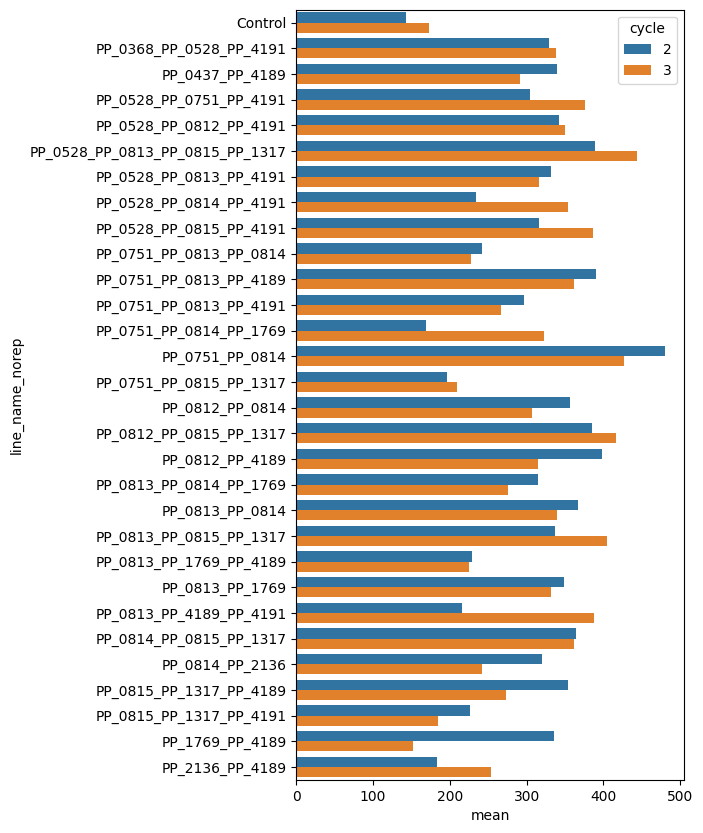

In [33]:
fig, ax = plt.subplots(figsize = (5, 10))
sns.barplot(data = df_merge, x = 'mean', y = 'line_name_norep', hue = 'cycle', ax = ax)

In [ ]:
fig, ax = plt.subplots(figsize = (5, 10))
sns.barplot(data = df_merge, x = 'mean', y = 'line_name_norep', hue = 'cycle', ax = ax)